### Information

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

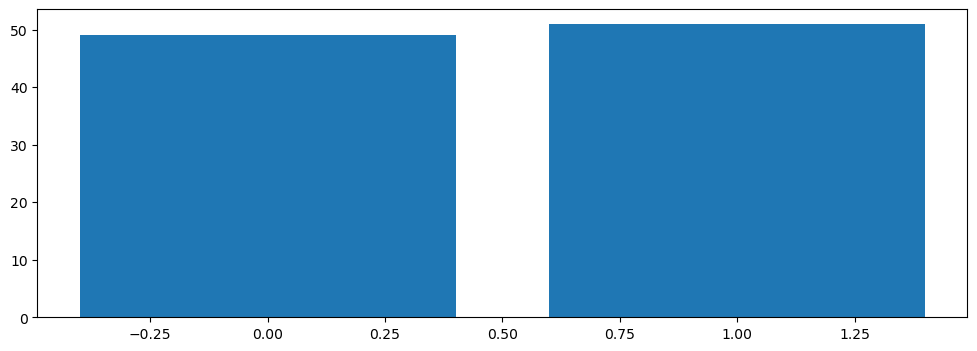

In [18]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [19]:
x, counts

(array([0, 1]), array([49, 51]))